# **Education and Air Pollution**

-----------------------------
## **Context**
-----------------------------

In this case study, we will use the Education dataset which contains information on educational institutes in the USA. The data has various attributes about the number of applications received, enrolments, faculty education, financial aspects, and the graduation rate of each institute.

-----------------------------
## **Objective** 
-----------------------------

The objective of this problem is to reduce the number of features by using dimensionality reduction techniques such as PCA and t-SNE, and extract insights about the data. 

-----------------------------
## **Dataset** 
-----------------------------

The Education dataset contains information on various colleges in the USA. It contains the following features:

- Names: Names of various universities and colleges
- Apps: The number of applications received
- Accept: The number of applications accepted
- Enroll: The number of new students enrolled
- Top10perc: The percentage of new students from the top 10% of Higher Secondary class
- Top25perc: The percentage of new students from the top 25% of Higher Secondary class
- F_Undergrad: The number of full-time undergraduate students
- P_Undergrad: The number of part-time undergraduate students
- Outstate: The number of students for whom the particular college or university is out-of-state tuition
- Room_Board: The cost of room and board
- Books: The estimated cost of books for a student
- Personal: The estimated personal spending for a student
- PhD: The percentage of faculties with a Ph.D.
- Terminal: The percentage of faculties with a terminal degree
- S_F_Ratio: Student/faculty ratio
- perc_alumni: Percentage of alumni who donate
- Expend: The instructional expenditure per student
- Grad_Rate: Graduation rate

## **Importing libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### **Loading data**

In [2]:
data = pd.read_csv("data/Education_Post_12th_Standard.csv")

In [3]:
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### **Checking the info of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

**Observations:**

- There are **777 observations and 18 columns** in the dataset.
- All columns have 777 non-null values, i.e., there are **no missing values**.
- **All columns are numeric except the "Names" column** which is of object data type.

## **Data Preprocessing and Exploratory Data Analysis**

**Let's check if all the college names are unique**

In [5]:
data.Names.nunique()

777

**Observations:**

- **All college names are unique**.
- As all entries are unique, **it would not add value to our analysis**. We can drop the "Names" column. 

In [6]:
# Dropping the "Names" column
data.drop(columns = "Names", inplace = True)

### **Summary Statistics**

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


**Observations:**

- On average, approximately 3,000 applications are received in these US universities, out of which around 2,000 applications are accepted by the universities and around 780 new students get enrolled.
- The standard deviation is very high for the variables - Apps, Accepted, and Enroll, which shows the variety of universities and colleges.
- The average cost of room and board, books, and personal expense is approx 4357, 550, and 1350 dollars respectively.
- The average number of full-time undergrad students is around 3700 whereas the average number of part-time undergrad students stands low at around 855.
- **PhD and Grad_Rate have a maximum value of greater than 100 which is not possible** as these variables are in percentages. Let's check how many such observations are there in the data.

In [8]:
data[(data.PhD > 100) | (data.Grad_Rate > 100)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


**There is just one such observation for each variable. We can cap the values to 100%.**

In [9]:
data.loc[582, "PhD"] = 100

data.loc[95, "Grad_Rate"] = 100

**Let's check the distribution and outliers for each column in the data.**

> [Measures of Skewness and Kurtosis](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=The%20skewness%20for%20a%20normal,have%20a%20skewness%20near%20zero.)
> - **The skewness for a normal distribution is zero**, and any symmetric data should have a skewness near zero. 
> - **Negative values for the skewness** indicate data that are skewed left and **positive values for the skewness** indicate data that are skewed right. 
> - **By skewed left**, we mean that the left tail is long relative to the right tail. Similarly, **skewed right** means that the right tail is long relative to the left tail. If the data are multi-modal, then this may affect the sign of the skewness.

Apps
Skew : 3.72


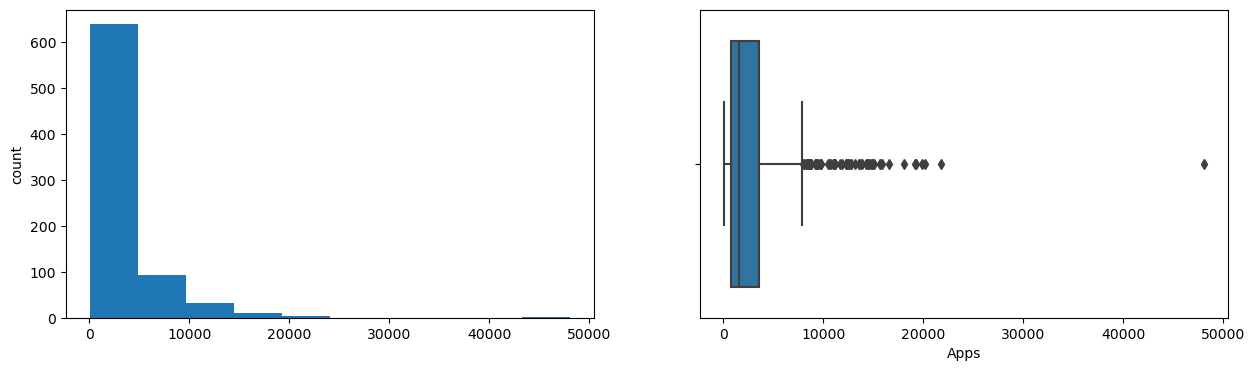

Accept
Skew : 3.42


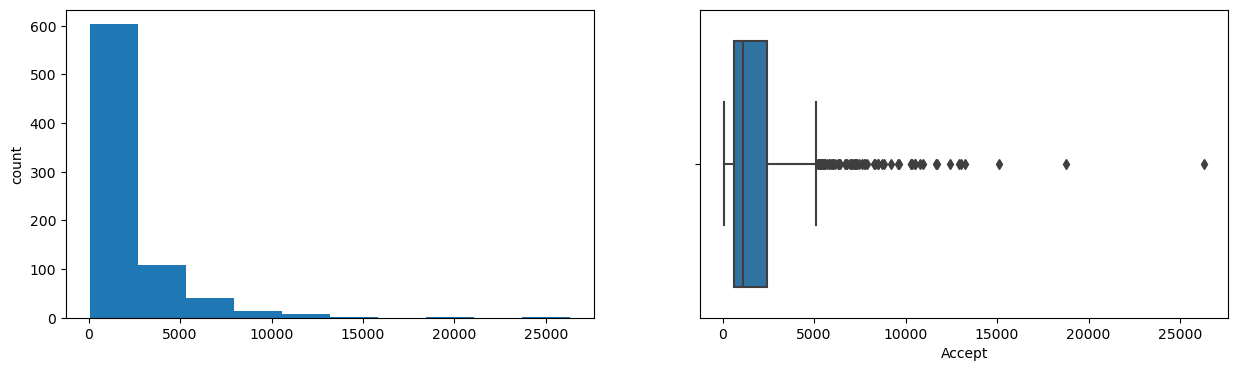

Enroll
Skew : 2.69


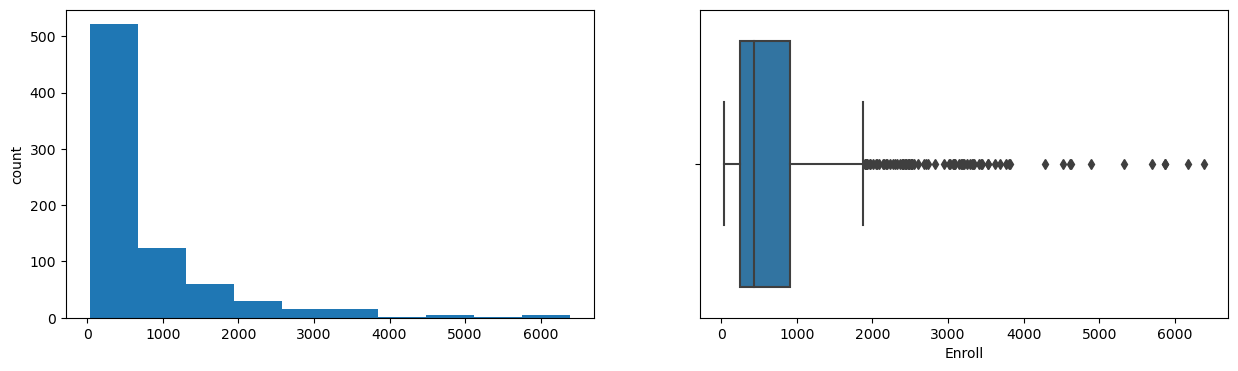

Top10perc
Skew : 1.41


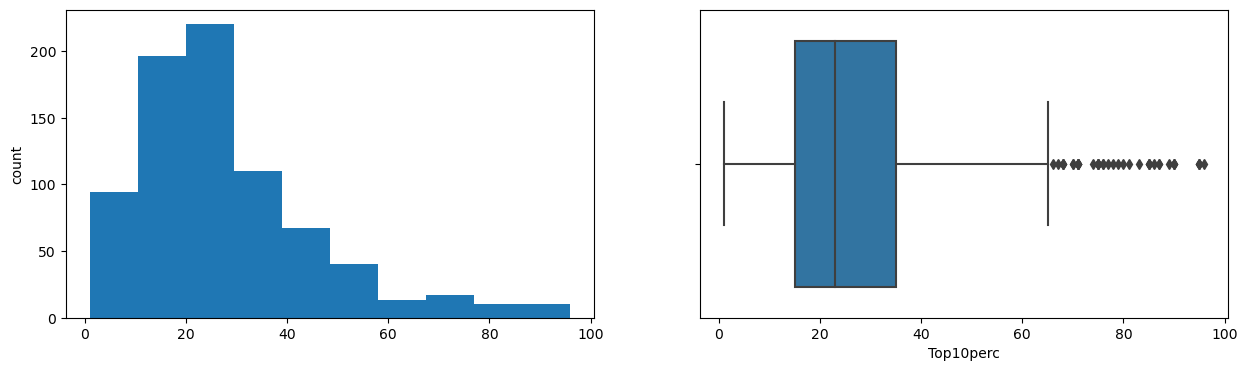

Top25perc
Skew : 0.26


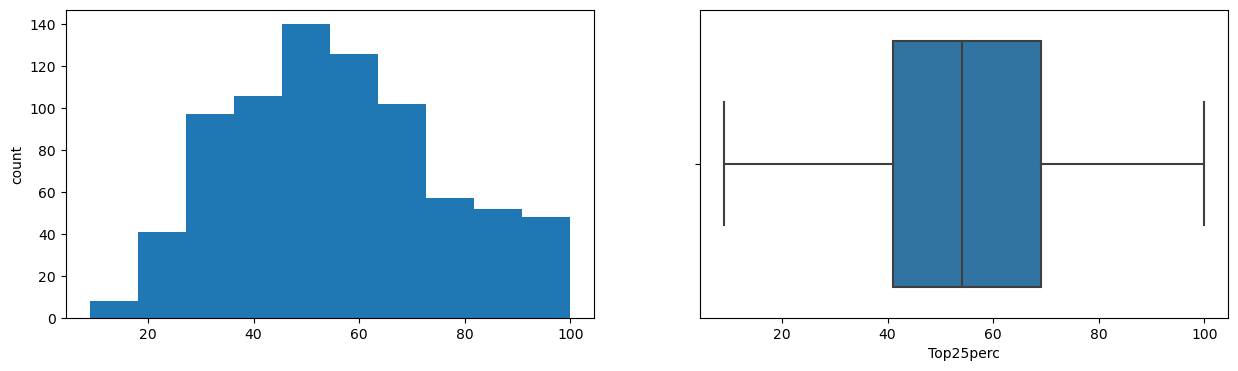

F_Undergrad
Skew : 2.61


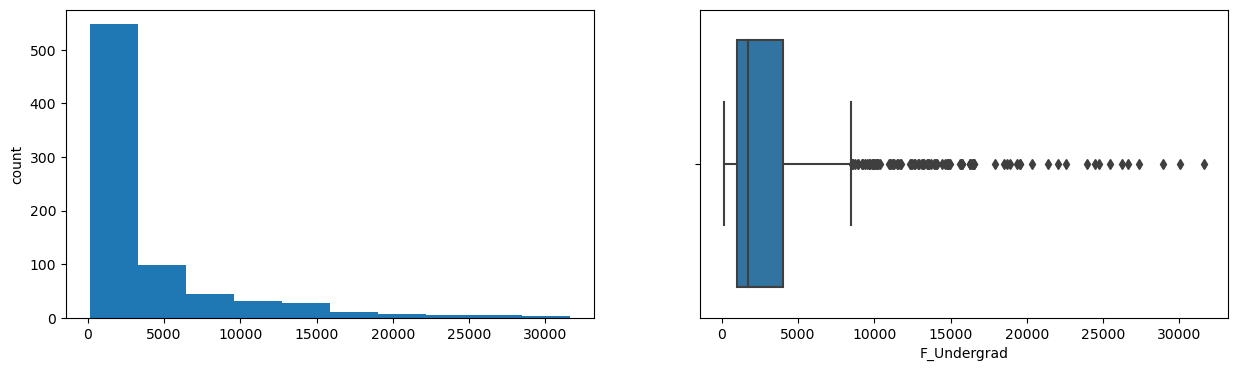

P_Undergrad
Skew : 5.69


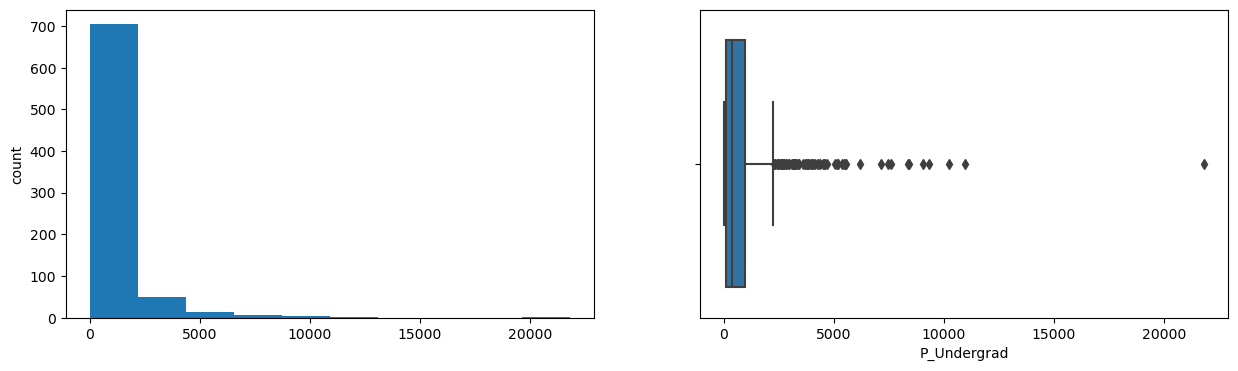

Outstate
Skew : 0.51


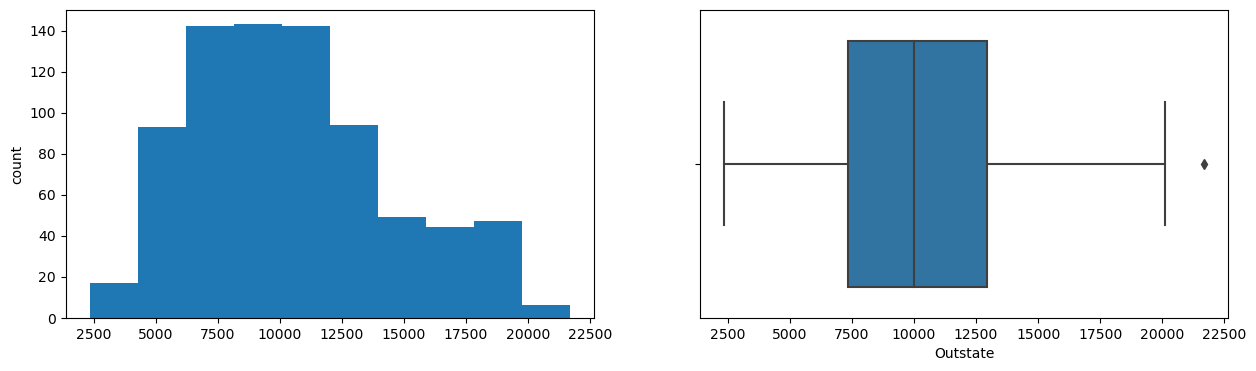

Room_Board
Skew : 0.48


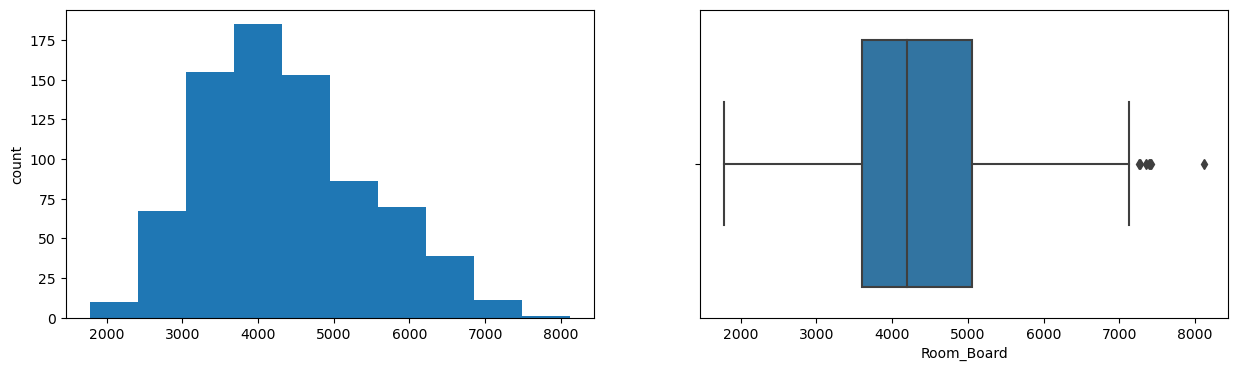

Books
Skew : 3.49


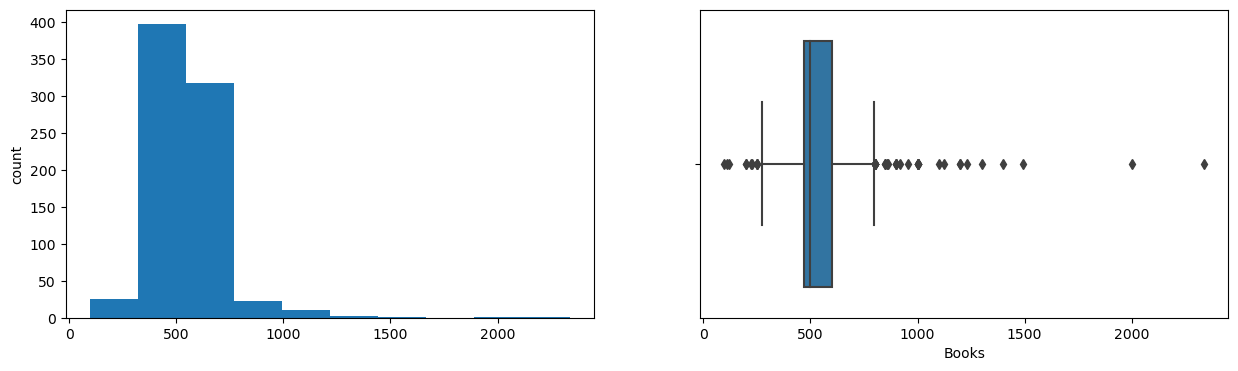

Personal
Skew : 1.74


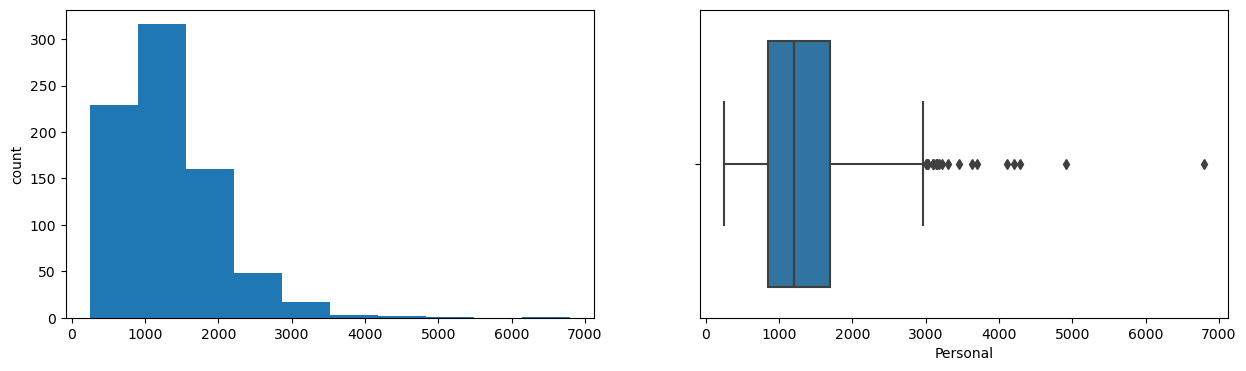

PhD
Skew : -0.77


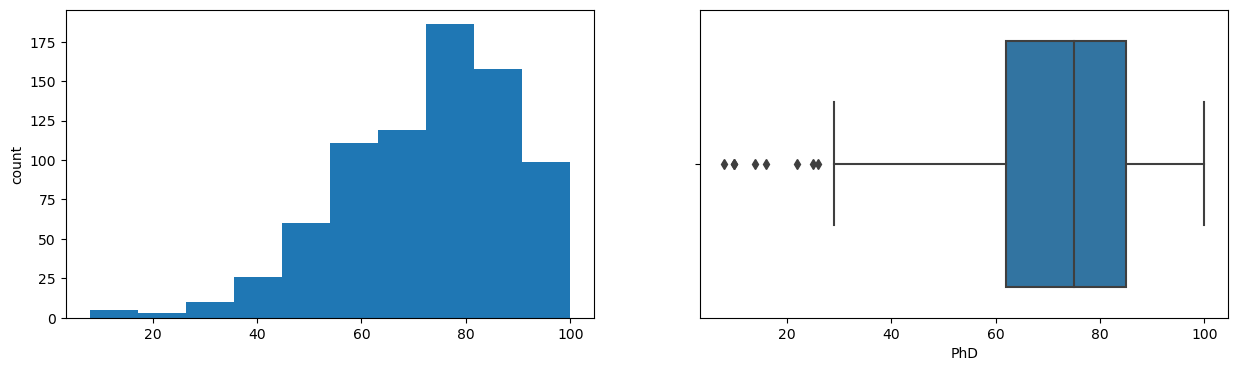

Terminal
Skew : -0.82


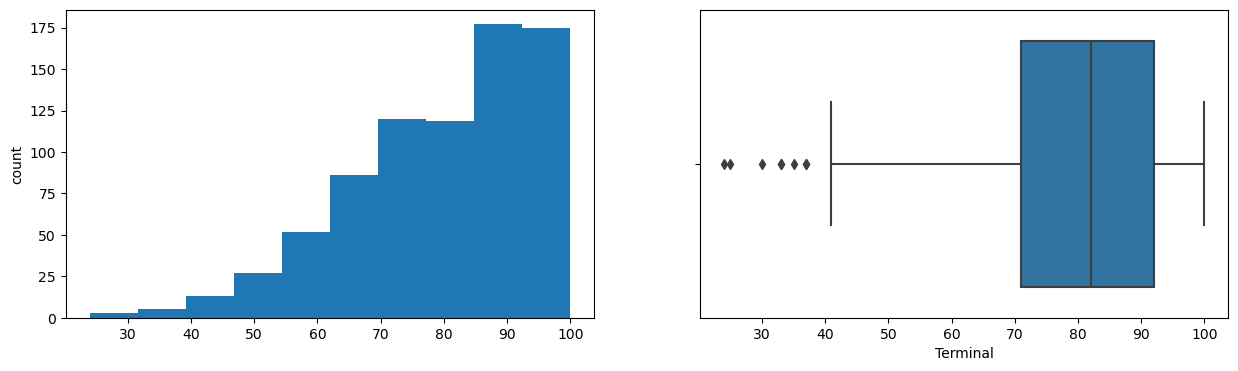

S_F_Ratio
Skew : 0.67


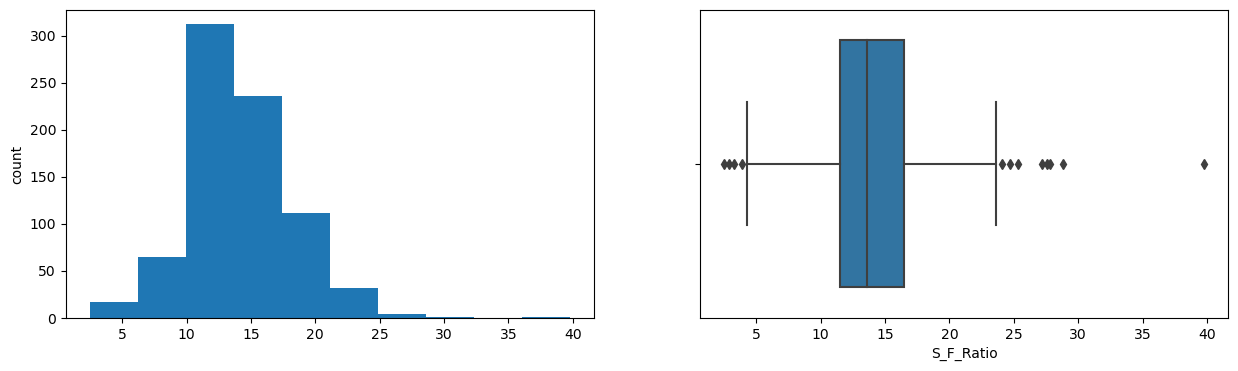

perc_alumni
Skew : 0.61


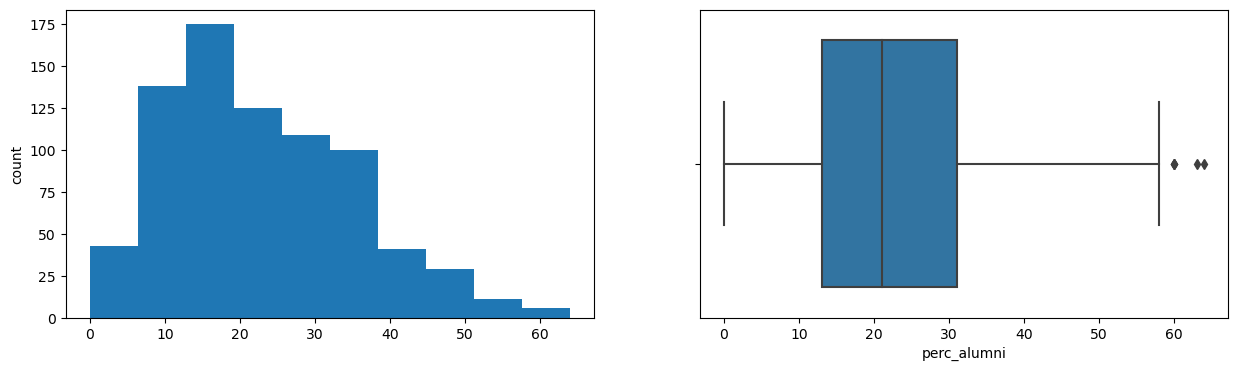

Expend
Skew : 3.46


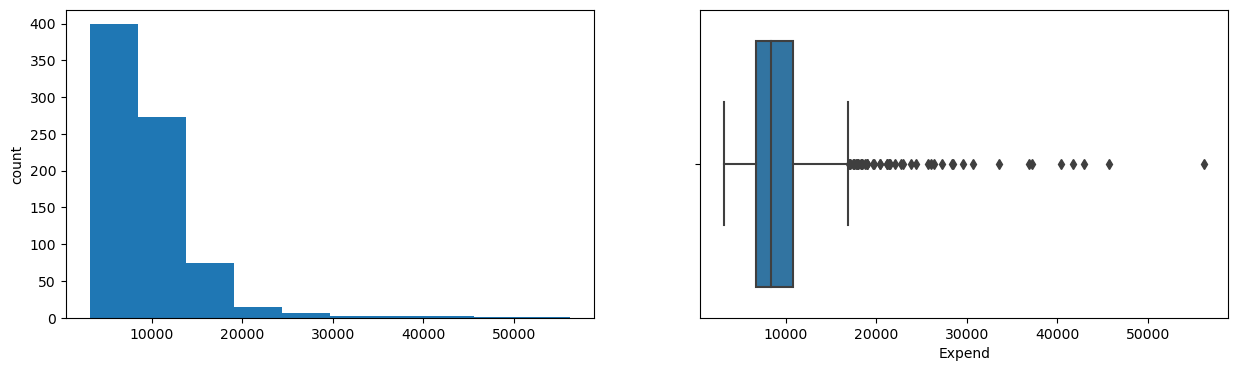

Grad_Rate
Skew : -0.14


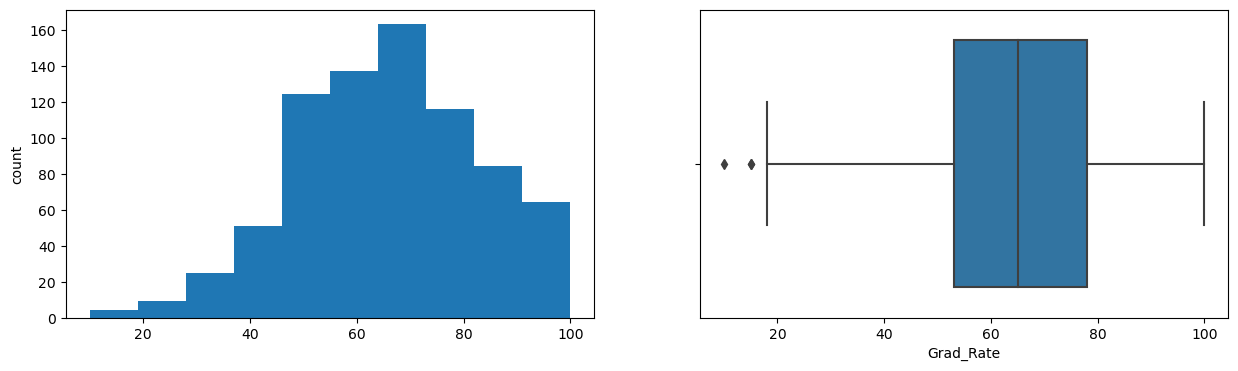

In [10]:
cont_cols = list(data.columns)

for col in cont_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins = 10, grid = False)
    plt.ylabel('count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[col])
    plt.show()

**Observations:**

- The distribution plots show that Apps, Accept, Enroll, Top10perc, F_Undergrad, P_Undergrad, Books, Personal, and Expend variables are highly right skewed. It is evident from the boxplots that all these variables have outliers.
- Top25percent is the only variable which does not possess outliers in the boxplot.
- Outstate, Room_Board, S_F_Ratio, and perc_alumni seem to have a moderate right skew.
- PhD and Terminal are moderately left skewed. 

**Now, let's check the correlation among different variables.**

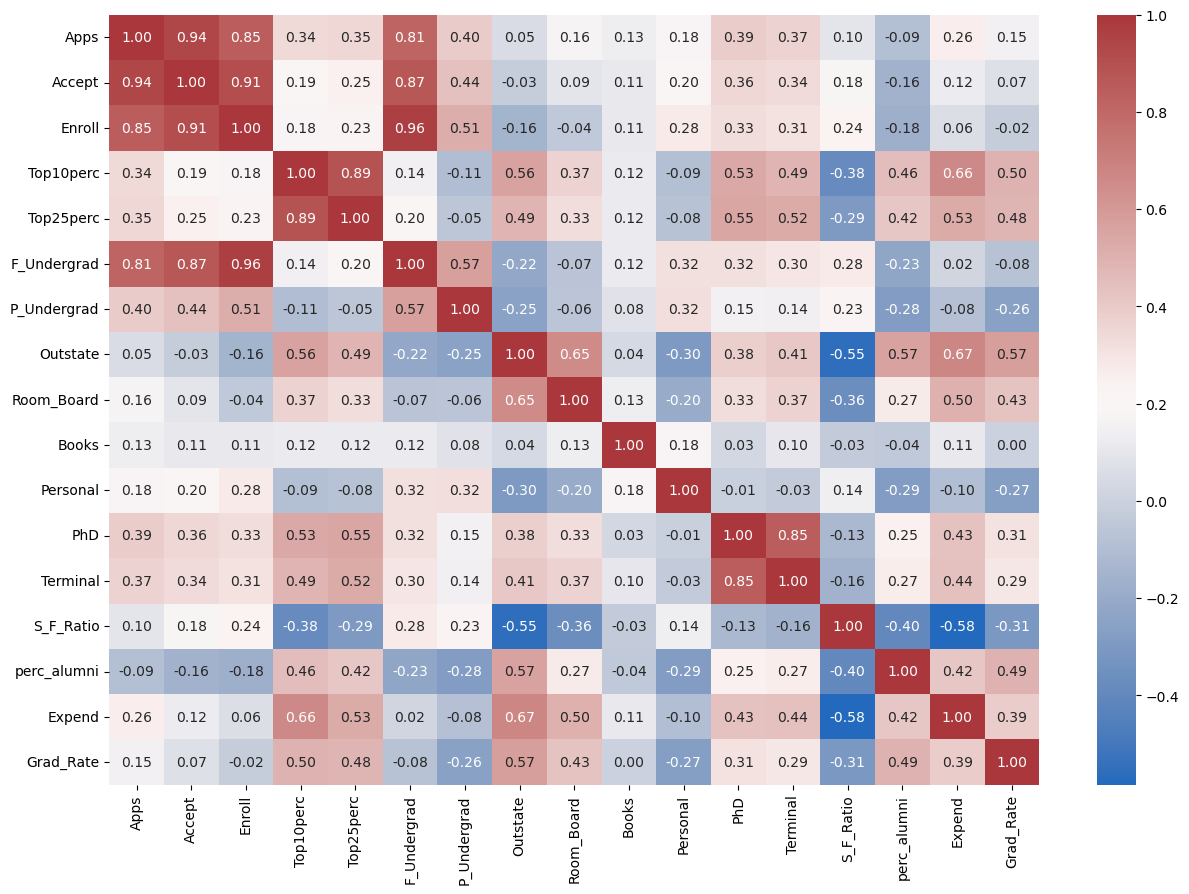

In [11]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f', cmap='vlag')
plt.show()

**Observations:**

- We can see a **high positive correlation** among the following variables: 
    1. Apps and Accept
    2. Apps and Enroll
    3. Apps and F_Undergrad
    4. Accept and Enroll
    5. Accept and F_Undergrad
    6. Enroll and F_Undergrad
    7. Top10perc and Top25percent
    8. PhD and Terminal
    <br><br>
    
- We can see a **high negative correlation** among the following variables:
    1. S_F_Ratio and Top10perc
    2. S_F_Ratio and Outstate

### **Scaling the data**

In [12]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [13]:
data_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375


## **Principal Component Analysis**

In [14]:
data_scaled.shape

(777, 17)

In [15]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components=n, random_state=1)

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_
exp_var

array([0.32046058, 0.26342915, 0.06901114, 0.05906272, 0.05489027,
       0.04982847, 0.0355726 , 0.03453611, 0.03116758, 0.02370464,
       0.01840343, 0.01295305, 0.00985822, 0.00844107, 0.00517124,
       0.00215728, 0.00135244])

In [16]:
data_scaled.shape, data_pca1.shape

((777, 17), (777, 17))

In [17]:
data_pca1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.593266,0.764607,-0.107060,-0.928681,-0.738979,-0.305103,0.639973,-0.873641,0.094534,0.052944,0.398840,-0.089344,-0.050615,0.180703,0.001674,-0.093432,0.093376
1,-2.193362,-0.581284,2.296629,3.587686,1.037785,-0.152909,0.263006,0.050182,1.120501,0.941130,-0.209081,0.098736,-0.250232,-0.741050,0.103980,-0.049794,-0.174007
2,-1.430551,-1.094598,-0.435461,0.688978,-0.372722,-0.954627,-0.245467,0.307045,-0.104452,0.637848,-0.156856,-0.346364,0.098029,0.225370,-0.022207,-0.003397,0.004114
3,2.857891,-2.626056,0.136121,-1.279351,-0.174330,-1.066654,-1.262575,-0.159711,0.372947,0.473619,-0.428548,0.682561,-0.074964,-0.007195,-0.072963,-0.190402,-0.174622
4,-2.217343,0.020351,2.382812,-1.106215,0.691579,-0.000224,-2.160878,-0.645014,-0.170606,0.376212,-0.159646,-0.054891,0.263895,-0.622582,-0.273720,0.012600,0.049645


In [18]:
# pca.explained_variance_ratio_.cumsum()
exp_var.cumsum()

array([0.32046058, 0.58388974, 0.65290088, 0.7119636 , 0.76685387,
       0.81668234, 0.85225494, 0.88679105, 0.91795863, 0.94166327,
       0.9600667 , 0.97301975, 0.98287797, 0.99131904, 0.99649028,
       0.99864756, 1.        ])

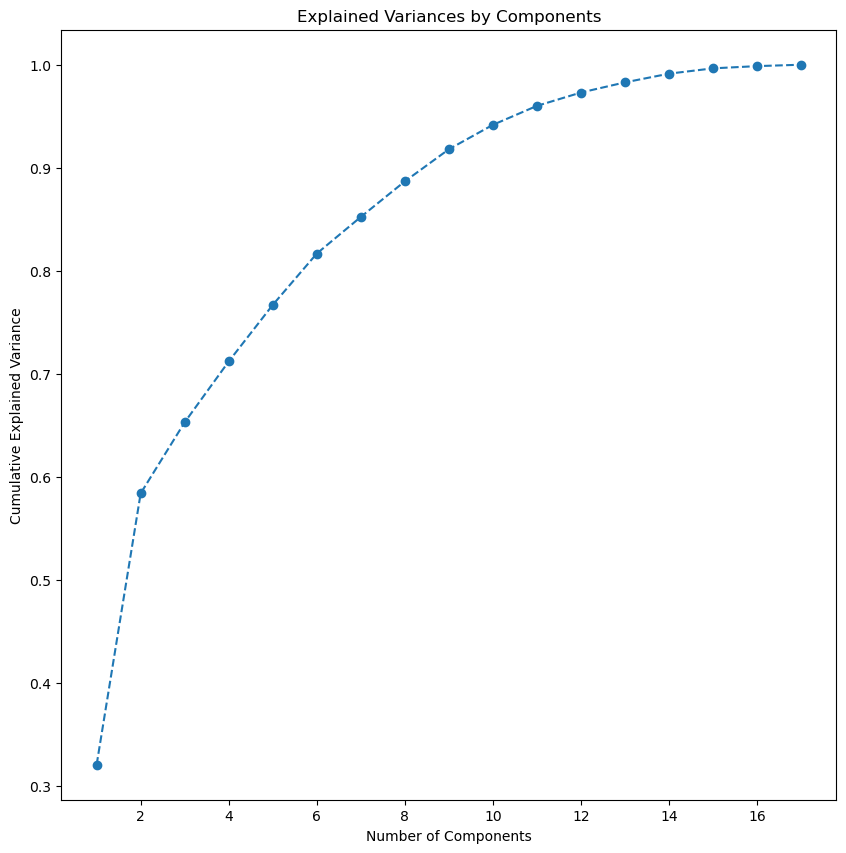

In [19]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

plt.show()

In [20]:
# Finding the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance:", ix + 1)
        break

Number of PCs that explain at least 70% variance: 4


**Observations**:

- We can see that out of the original 17 features, we have reduced the number of features through PCA to 4 principal components. The first four principal components explain approximately 70% of the original variance.

- So that is about a **76% reduction in the dimensionality of the dataset with only a loss of 30% in variance**.

Now, let us look at these **principal components as a linear combination of the original features**.

In [21]:
pca.components_.shape # Because we defined "n" as the number of columns of our scaled data
                      # n = data_scaled.shape[1]
                      # pca = PCA(n_components=n, random_state=1)
                      # So we got 17 new features that combine the 17 columns we have in the
                      # scaled data.

(17, 17)

In [22]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4']

data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2), 
                        index = pc_comps, columns = data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4
Apps,0.25,0.33,-0.06,0.28
Accept,0.21,0.37,-0.10,0.27
Enroll,0.18,0.40,-0.08,0.16
Top10perc,0.35,-0.08,0.03,-0.05
Top25perc,0.34,-0.04,-0.02,-0.11
F_Undergrad,0.15,0.42,-0.06,0.10
P_Undergrad,0.03,0.32,0.14,-0.16
Outstate,0.29,-0.25,0.05,0.13
Room_Board,0.25,-0.14,0.15,0.19
Books,0.06,0.06,0.68,0.08


**Observations:**

- Each principal component is a linear combination of the original features. 
- For example, we can write the equation for PC1 in the following manner:

> PC1 = 0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc <br> 
> $\hspace{1cm}$ + 0.15 * F_Undergrad + 0.03 * P_Undergrad + 0.29 * Outstate + 0.25 * Room_Board <br>
> $\hspace{1cm}$ + 0.06 * Books - 0.04 * Personal + 0.32 * PhD + 0.32 * Terminal <br>
> $\hspace{1cm}$ - 0.18 * S_F_Ratio + 0.21 * perc_alumni + 0.32 * Expend + 0.25 * Grad_Rate

- The first two principal components pick up around 58% of the variability in the data, which is a considerable amount.

- The magnitude of the weights multiplied with each of the original features that comprise a principal component, is one way to look at the importance of each of the original features. This is relevant in a business context, in deciding which features in the dataset are important for the problem and which ones are not. Normally, a threshold is used as a cut-off to determine if a feature is important or not. **For example, we can consider only those weights with an absolute value greater than 0.25 as significant.**

**Note:** The decision regarding this threshold value may vary from case to case, and is purely a business decision.

In [23]:
def color_high(val):
    if val < -0.25:                     # You can decide any value as per your understanding
        return 'background: pink'
    elif val > 0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
Apps,0.250000,0.330000,-0.060000,0.280000
Accept,0.210000,0.370000,-0.100000,0.270000
Enroll,0.180000,0.400000,-0.080000,0.160000
Top10perc,0.350000,-0.080000,0.030000,-0.050000
Top25perc,0.340000,-0.040000,-0.020000,-0.110000
F_Undergrad,0.150000,0.420000,-0.060000,0.100000
P_Undergrad,0.030000,0.320000,0.140000,-0.160000
Outstate,0.290000,-0.250000,0.050000,0.130000
Room_Board,0.250000,-0.140000,0.150000,0.190000
Books,0.060000,0.060000,0.680000,0.080000


**Observations:**

- The first principal component, PC1, seems to be related to high values of student scores (Top10perc, Top25perc), number of out-of-state students (Outstate), the faculty education level (PhD and Terminal), and the instructional expenditure (Expend) per student. The **first principal component seems to capture attributes that generally define premier colleges with a high quality of students entering them, and more accomplished faculty teaching there. The students entering these colleges also appear to be relatively financially well-off.** 
- The second principal component, PC2, seems to be related to high values of number of applications received (Apps), accepted (Accept), and enrolled (Enroll), and the number of full time (F_Undergrad) and part time (P_Undergrad) students. The **second principal component seems to capture attributes that generally define non-premier colleges that are comparatively easier to get admissions into.**
- **The third principal component, PC3, seems to be related to financial aspects**, i.e., personal spending (Personal) and cost of books (Books) for a student. It is also associated with low values of student faculty ratio (S_F_Ratio).
- The fourth principal component, PC4, seems to be related to lower values of faculty education level and high values of students' graduation rate. The **fourth principal component seems to capture attributes that define colleges which lack highly educated faculty (PhD and Terminal) and are comparatively easier to graduate from (Grad_Rate).**

**We can also visualize the data in 2 dimensions, using the first two principal components.**

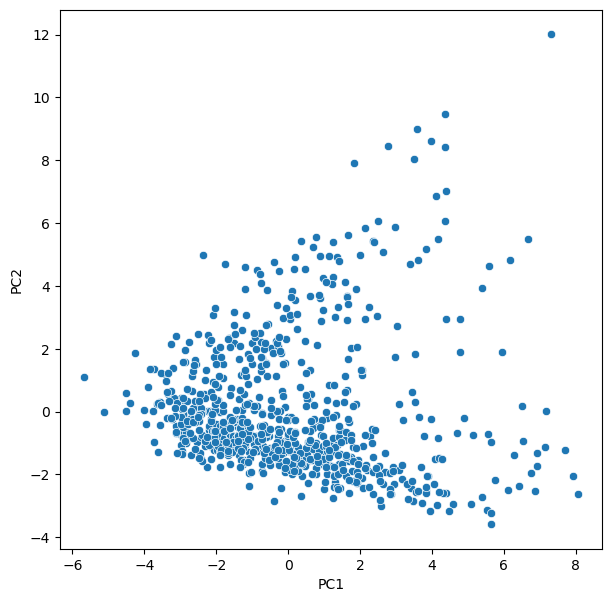

In [24]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = data_pca1[0], y = data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## **t-SNE**

Let's try to visualize the data using t-SNE by reducing the number of dimensions to 2 and 3.

#### **2D visualization**

In [25]:
# Fitting t-SNE with number of components equal to 2 
tsne = TSNE(n_components=2, random_state=1)

data_tsne = tsne.fit_transform(data_scaled)
data_tsne

array([[-1.1885940e+01,  1.1003891e+01],
       [-2.5160263e+01, -1.6048864e+01],
       [-2.0736464e+01, -9.3793898e+00],
       ...,
       [-8.9589090e+00,  4.3468213e+00],
       [ 3.6200066e+01, -8.4966507e+00],
       [ 3.2909185e-02, -9.8042637e-01]], dtype=float32)

In [26]:
# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2'])
data_tsne

,X1,X2
0,-11.885940,11.003891
1,-25.160263,-16.048864
2,-20.736464,-9.379390
3,21.933973,-17.716225
4,-14.860337,8.927657
...,...,...
772,-20.590107,15.841823
773,-0.326879,-12.576502
774,-8.958909,4.346821
775,36.200066,-8.496651


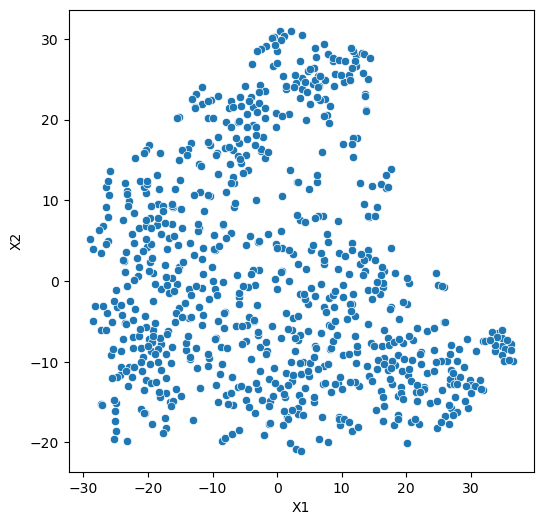

In [27]:
# Scatter plot for two components
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
plt.show()

#### **3D visualization**

In [28]:
# Fitting t-SNE with number of components equal to 3 
tsne = TSNE(n_components = 3, random_state = 1)
data_tsne = tsne.fit_transform(data_scaled)
data_tsne

array([[-5.482882  ,  3.7550976 , -3.8733423 ],
       [-8.393721  , -7.255598  ,  4.440808  ],
       [-9.790572  , -4.4703364 , -0.34139216],
       ...,
       [-1.4934553 ,  1.7000386 ,  3.8259053 ],
       [15.252082  ,  1.0319713 ,  1.7342273 ],
       [ 1.4804798 ,  4.100036  ,  5.335857  ]], dtype=float32)

In [29]:
data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2', 'X3'])
data_tsne

,X1,X2,X3
0,-5.482882,3.755098,-3.873342
1,-8.393721,-7.255598,4.440808
2,-9.790572,-4.470336,-0.341392
3,9.484363,-7.767666,-3.761872
4,-5.036928,2.294664,-0.945720
...,...,...,...
772,-7.752467,5.474601,2.836140
773,-1.056202,-5.798538,2.063572
774,-1.493455,1.700039,3.825905
775,15.252082,1.031971,1.734227


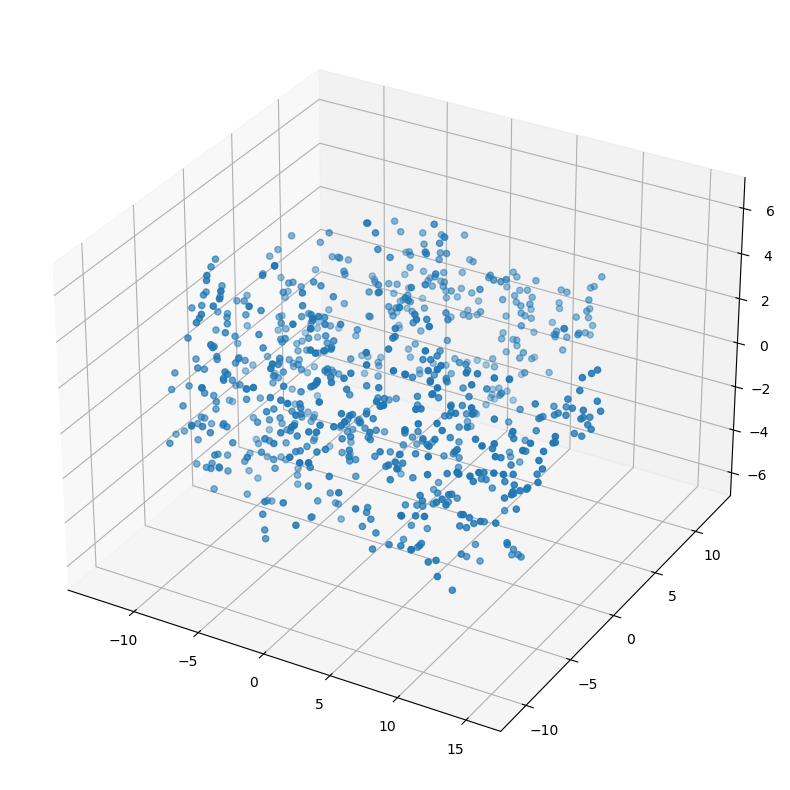

In [30]:
# Scatter plot for all three components
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
x = data_tsne['X1']
y = data_tsne['X2']
z = data_tsne['X3']
ax.scatter(x, y, z)
plt.show()

**Observations:**

- We know that t-SNE preserves the local structure of the data while embedding the data from high dimensions to low dimensions.
- Here, we have generated the 2D and 3D embeddings for the data. We can see that there is no pattern in the data - it is scattered and clustered together with the exception of some outliers.
- Let's try different perplexity values to visualize the data in 2D.

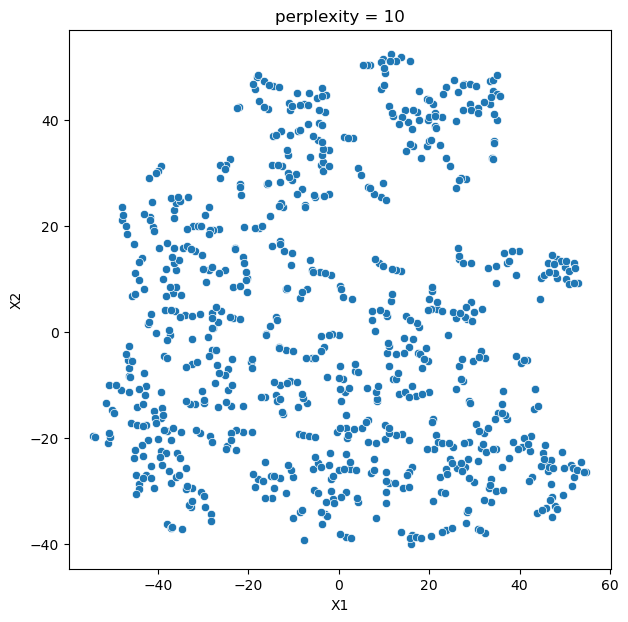

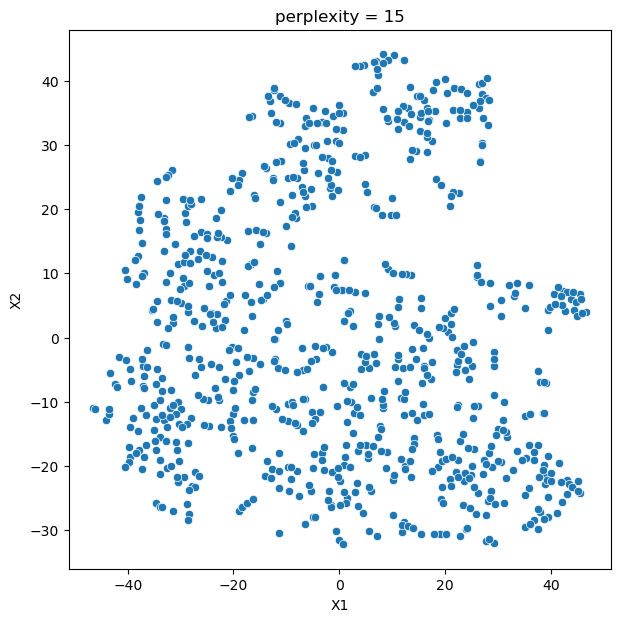

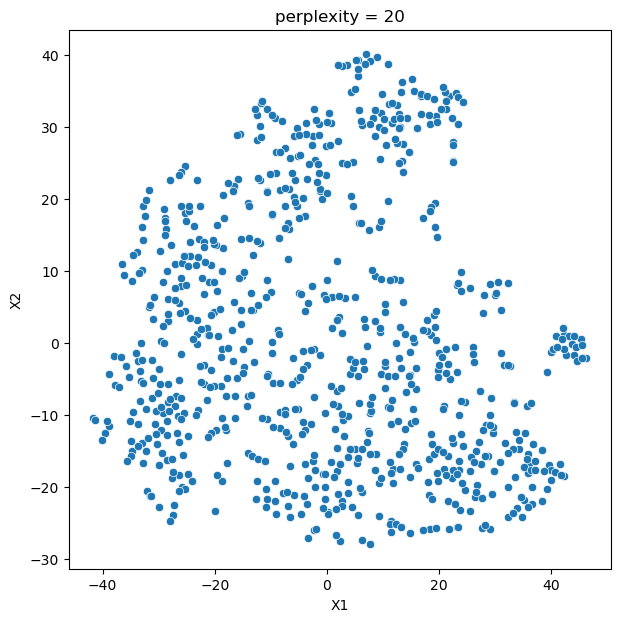

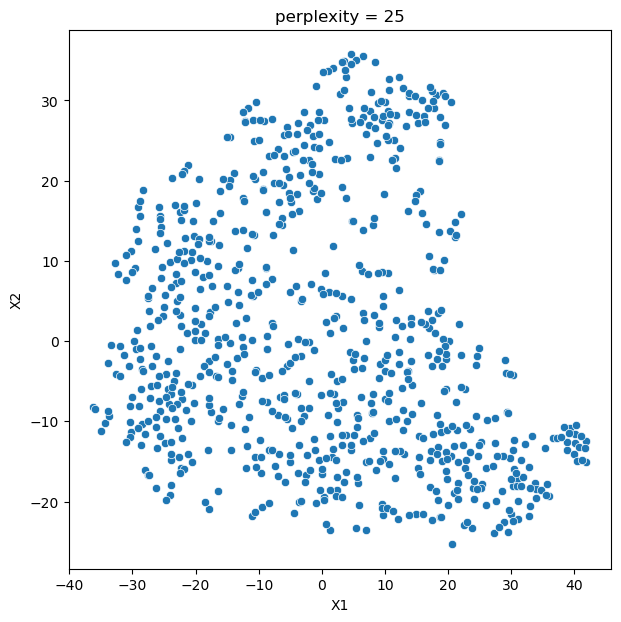

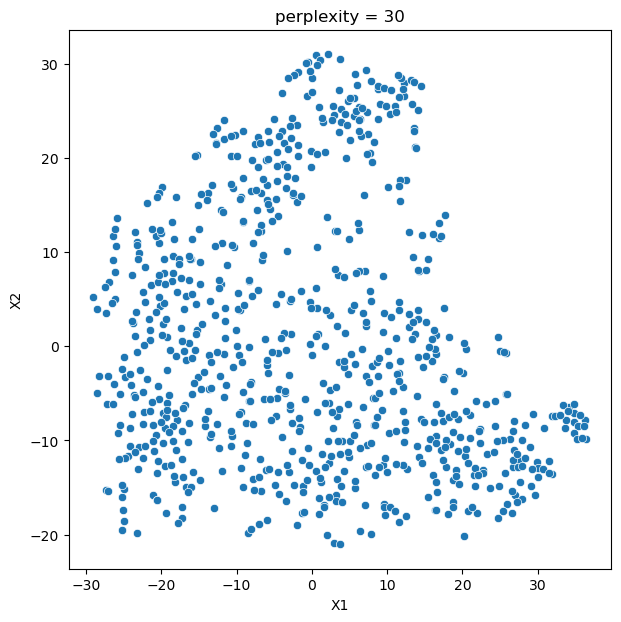

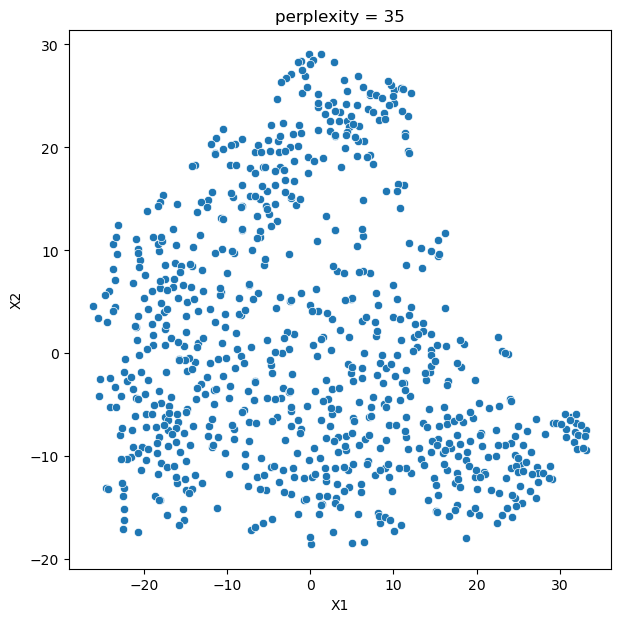

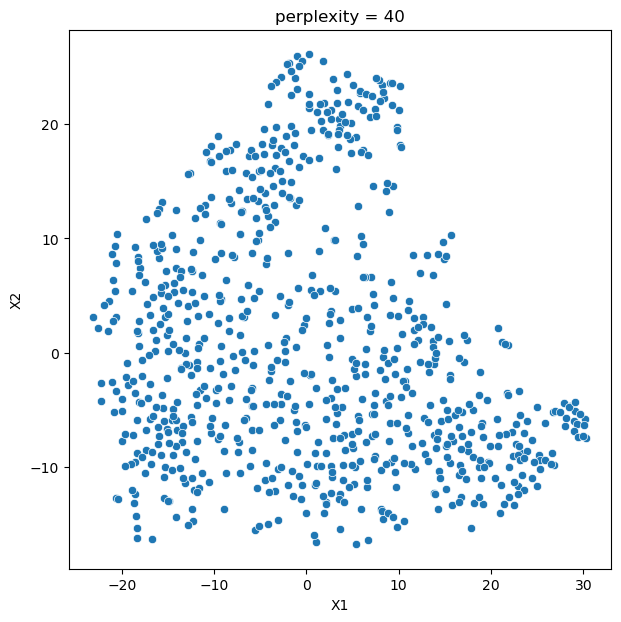

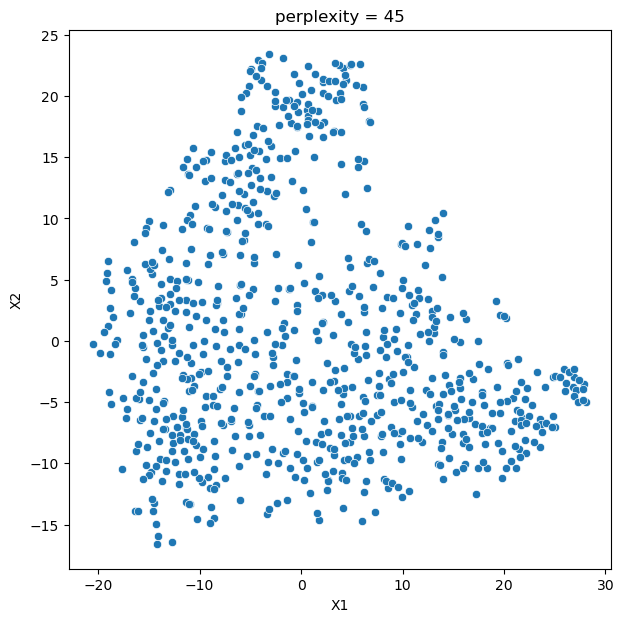

In [31]:
for i in range(10, 50, 5): # [10, 15, 20, 25, 30, 35, 40, 45]
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i) # perplexityfloat, default=30.0
                                                                    # The perplexity is related to 
                                                                    # the number of nearest neighbors 
                                                                    # that is used in other manifold 
                                                                    # learning algorithms. 
                                                                    # Larger datasets usually 
                                                                    # require a larger perplexity. 
                                                                    # Consider selecting a value 
                                                                    # between 5 and 50. 
                                                                    # Different values can result 
                                                                    # in significantly different 
                                                                    # results. 
                                                                    # The perplexity must be less 
                                                                    # than the number of samples.
    data_tsne = tsne.fit_transform(data_scaled)
    data_tsne = pd.DataFrame(data_tsne)
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7, 7))
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    plt.title("perplexity = {}".format(i))

**Observations:**

- All the plots with different perplexity values imply that **there is no underlying pattern in the data**.
- This shows that **observing patterns in data projection and visualization techniques like PCA and t-SNE, is actually dependent on the nature of the data**. Let's look at the implementation of PCA and t-SNE on another dataset.

## **Air Pollution Data**

- In this segment of the case study, let us apply the same techniques to another dataset relating to air pollution. 
- This dataset contains about **13 months of data on major pollutants and meteorological levels of a city**.
- Let's get an overview of the data and prepare it for visualization.

In [32]:
# Loading the data
data_air_pol = pd.read_csv("data/Delhi+Air+Pollution+Case+Study-Dataset.csv")

In [33]:
data_air_pol.head()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


**Checking the info of the data**

In [34]:
data_air_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

**Observations:**

- There are **403 observations and 27 columns** in the data.
- **All the columns except Date and Weather are of numeric data type**.
- The **Date and SrNo for all observations would be unique. We can drop these columns** as they would not add value to our analysis.
- Weather is of object data type. We can create **dummy variables** for each category and convert it to numeric data type.
- The majority of the **columns have some missing values**.
- Let's **check the number of missing values** in each column.

In [35]:
data_air_pol.isnull().sum()

SrNo                  0
Date                  0
NO                    2
CO                    1
NO2                   2
O3                    6
SO2                   4
PM2.5                 2
Benzene               1
Toulene               1
P_Xylene             31
NOx                   2
PM10                  2
WindDirection         1
NH3                   2
RH                    1
Temp                  2
WindSpeed             1
VerticalWindSpeed     2
Solar                 2
BarPressure           2
Weather               0
PD_PM2.5             10
PD_PM10              11
PD_NO2               12
PD_SO2               13
PD_CO                11
dtype: int64

**Observation:**

- All the columns except SrNo and Date have missing values.
- We will impute (fill in) these missing values by using the mode for the categorical variables and the median for the numerical ones. 

### **Data Preprocessing**

In [36]:
# Dropping the columns - SrNo and Date
data_air_pol.drop(columns = ["SrNo", "Date"], inplace = True)

In [37]:
# Imputing missing values with mode for the Weather column and with median for all other columns
for col in data_air_pol.columns:
    
    if col == "Weather":
        data_air_pol[col].fillna(value = data_air_pol[col].mode()[0], inplace = True)
    
    else:
        data_air_pol[col].fillna(value = data_air_pol[col].median(), inplace = True)

In [38]:
# Creating dummy variables for Weather column
data_air_pol = pd.get_dummies(data_air_pol, drop_first = True)

#### **Scaling the data**

In [39]:
scaler1 = StandardScaler()
data_air_pol_scaled = scaler.fit_transform(data_air_pol)

In [40]:
data_air_pol_scaled = pd.DataFrame(data_air_pol_scaled, columns = data_air_pol.columns)
data_air_pol_scaled.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,-0.762685,-0.274719,-1.028104,-0.176087,-0.360903,-0.966206,-1.005290,-0.726103,-0.766391,-1.006218,...,-0.175488,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
1,-0.765059,-1.244831,-1.131729,-1.256817,-0.367671,-0.832590,-0.839185,-0.586470,-0.817281,-1.018023,...,0.828051,-0.967381,-1.365729,-1.030531,-0.358008,-0.265288,-0.426401,-0.410019,1.37061,-0.39755
2,-0.758763,-1.069585,-0.565477,1.292291,-0.510985,-0.990760,-1.065691,-0.826253,-0.700079,-0.916904,...,-2.500352,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
3,-0.759073,-0.900598,-0.421877,0.362069,-0.388372,-0.203844,-0.655463,-0.619211,-0.510398,-0.893437,...,-1.167876,-0.991995,-0.702821,-0.564440,-0.508908,-1.069106,-0.426401,-0.410019,1.37061,-0.39755
4,-0.751125,-1.082103,-0.482810,0.449383,-0.225551,-0.300152,-0.335838,-0.119422,-0.047760,-0.903606,...,-1.084248,-0.203159,-0.247001,-0.419764,-0.385627,-0.898215,-0.426401,-0.410019,1.37061,-0.39755


### Principal Component Analysis

In [41]:
# Defining the number of principal components to generate
n = data_air_pol_scaled.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
data_air_pol_pca = pd.DataFrame(pca1.fit_transform(data_air_pol_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

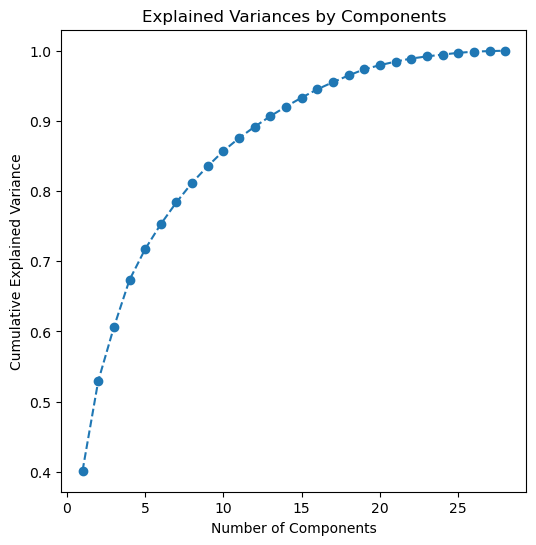

In [42]:
# Visualize the explained variance by individual components
plt.figure(figsize = (6, 6))
plt.plot(range(1, 29), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [43]:
# Find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var1):
    sum = sum + i
    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  5


In [44]:
# Making a new dataframe with first 5 principal components as 
# columns and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5], 2), 
                   index = data_air_pol_scaled.columns, columns = cols)

In [45]:
def color_high(val):
    if val <= -0.25:                    # You can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.25:
        return 'background: skyblue'   
    
pc1.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
NO,0.250000,-0.050000,0.180000,0.140000,-0.130000
CO,0.210000,0.040000,0.180000,-0.000000,-0.030000
NO2,0.190000,-0.220000,0.180000,0.060000,0.240000
O3,0.020000,-0.380000,-0.020000,0.180000,0.080000
SO2,0.120000,-0.190000,-0.200000,0.280000,-0.110000
PM2.5,0.260000,-0.060000,-0.100000,-0.180000,-0.140000
Benzene,0.270000,0.090000,0.150000,0.010000,-0.010000
Toulene,0.250000,0.100000,0.270000,0.080000,0.010000
P_Xylene,0.250000,0.070000,0.220000,0.030000,-0.100000
NOx,0.240000,0.010000,0.260000,0.150000,-0.120000


**Observations:**

- The first principal component, PC1, seems to be related to hydrocarbons like Benzene, Toluene, and Xylene that are generated due to fuel combustion.   
- The second principal component, PC2, seems to be related to humidity (RH), Ozone level, and rain, i.e., the rainy season. Whenever humidity goes down, the Ozone level goes up - more sunshine. Higher humidity is an indication of rain which has the potential to wash away atmospheric pollution.
- The third principal component, PC3, seems to be capturing air pressure - low pressure accompanies windy and rainy conditions, dispersing the pollution away. High pressure stills the wind allowing pollution to build up in urban areas. 
- The fourth principal component, PC4, seems to be associated with high values of toxic gases like SO2 and is also related to the weather.
- The fifth principal component, PC5,  seems to be explaining the direction of the wind which impacts air pollution irrespective of the concentration of all pollutants. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction, for example, open farmland.

### **t-SNE**

Let's try to **visualize the data for different perplexity values.** 

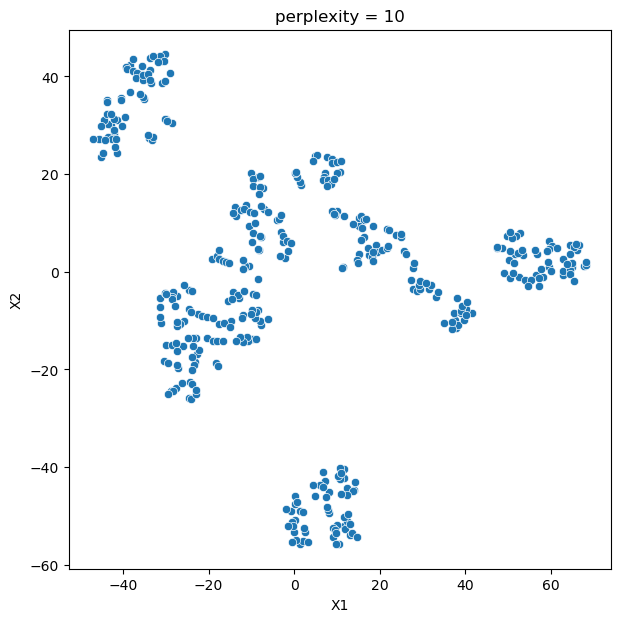

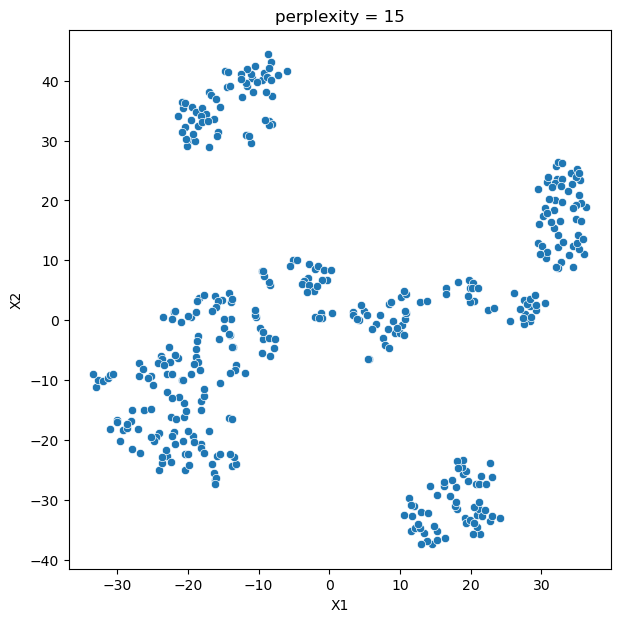

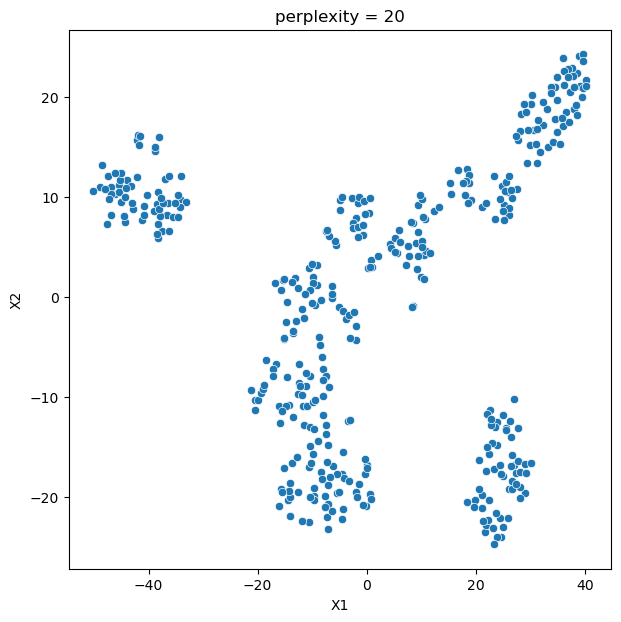

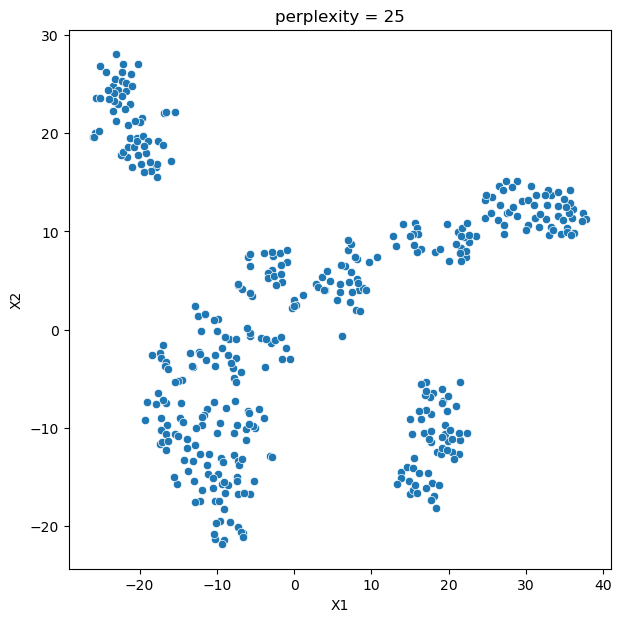

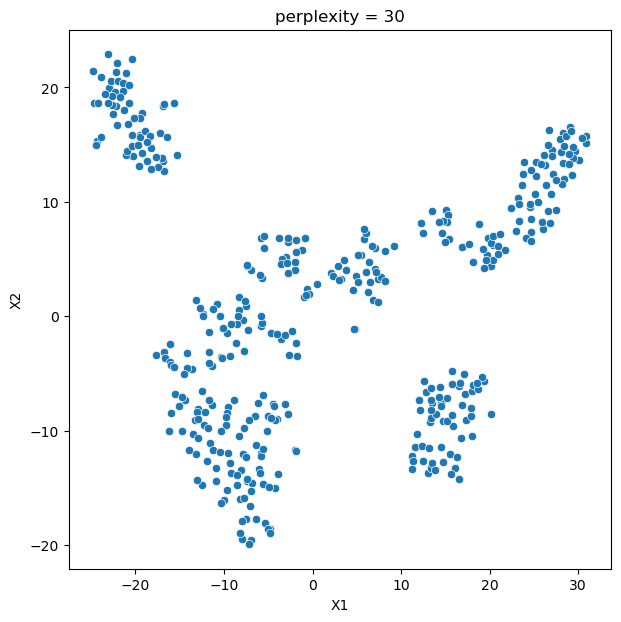

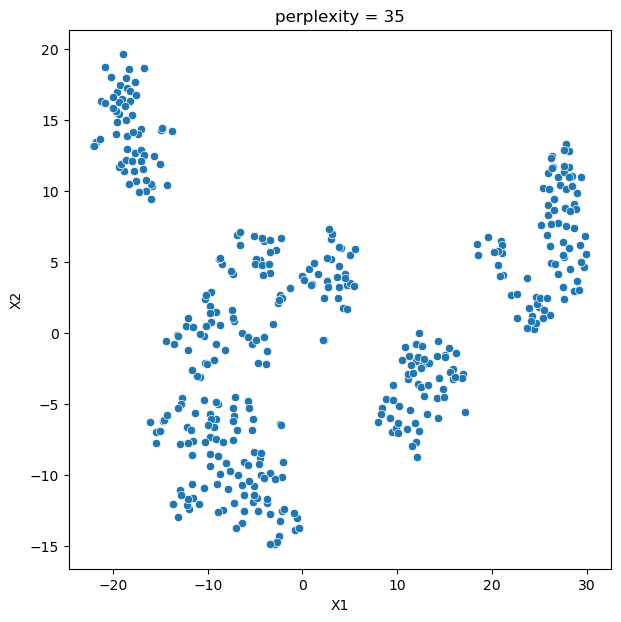

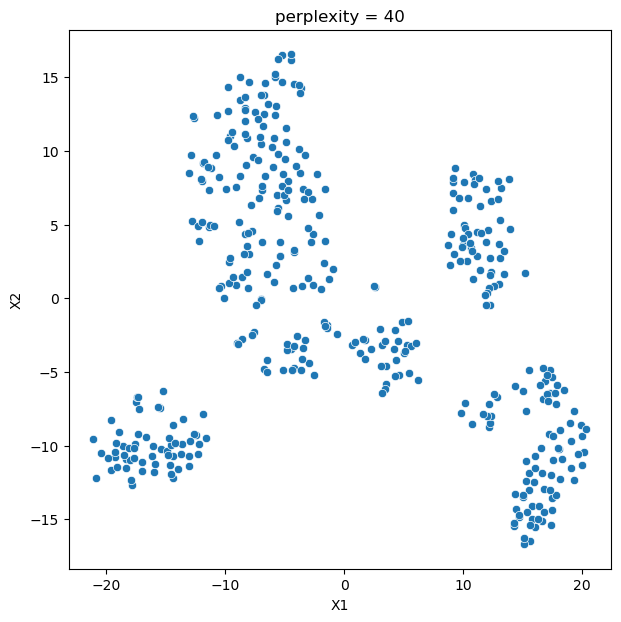

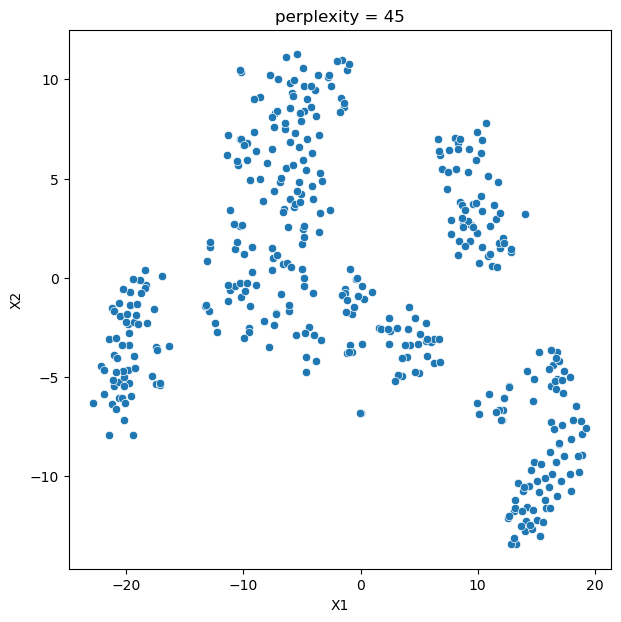

In [46]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_air_pol_tsne = tsne.fit_transform(data_air_pol_scaled)
    data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne)
    data_air_pol_tsne.columns = ['X1', 'X2']

    plt.figure(figsize = (7,7))    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne)
    plt.title("perplexity = {}".format(i))

**Observations:**

- We observe that some perplexity values like 35 and 45 are able to capture the underlying patterns in the data better than other values.
- This shows that perplexity plays an important role in t-SNE implementation.
- Let's visualize again with **perplexity equal to 35 as there are 4 clear groups which are distant from each other, i.e., well separated.**

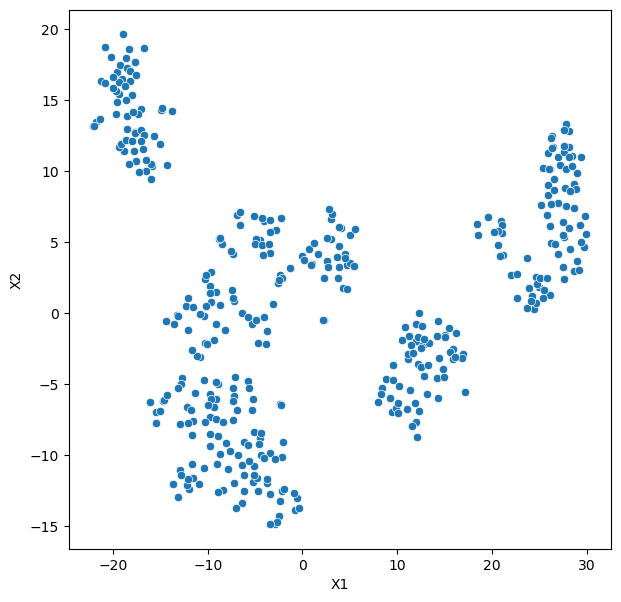

In [47]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)

data_air_pol_tsne = tsne.fit_transform(data_air_pol_scaled)

# Converting the embeddings to a dataframe
data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (7, 7))
sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne)
plt.show()

**Observations:**

- We can clearly see **4 groups in the data**.
- Let's **label these 4 groups** using the values of the X1 and X2 axes.

In [48]:
# Let's assign points to 4 different groups
def grouping(x):
    first_component = x['X1']
    second_component = x['X2']
    
    if second_component > 12:
        return 'group_1'
    elif (second_component < -10) and (first_component > -10): 
        return 'group_2'
    elif (second_component < 12) and (first_component > -9):
        return 'group_3'
    else: 
        return 'group_4'

In [49]:
data_air_pol_tsne['groups'] = data_air_pol_tsne.apply(grouping, axis = 1)
data_air_pol_tsne.head()

,X1,X2,groups
0,-9.170305,1.460921,group_4
1,-9.609689,2.909789,group_4
2,-8.934766,-4.991727,group_3
3,-7.335166,-5.269650,group_3
4,-7.171617,-5.862649,group_3


<Axes: xlabel='X1', ylabel='X2'>

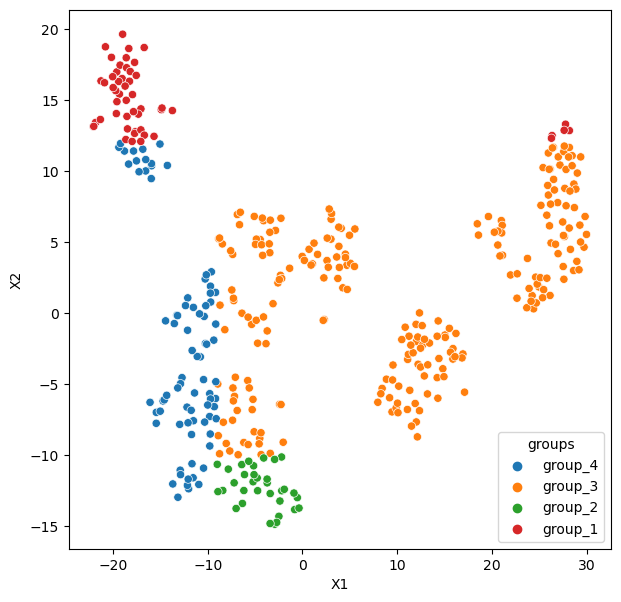

In [50]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))
sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne, hue = 'groups')

**Now, let's try to visualize the properties of these four groups with respect to all the numeric variables in the data.** 

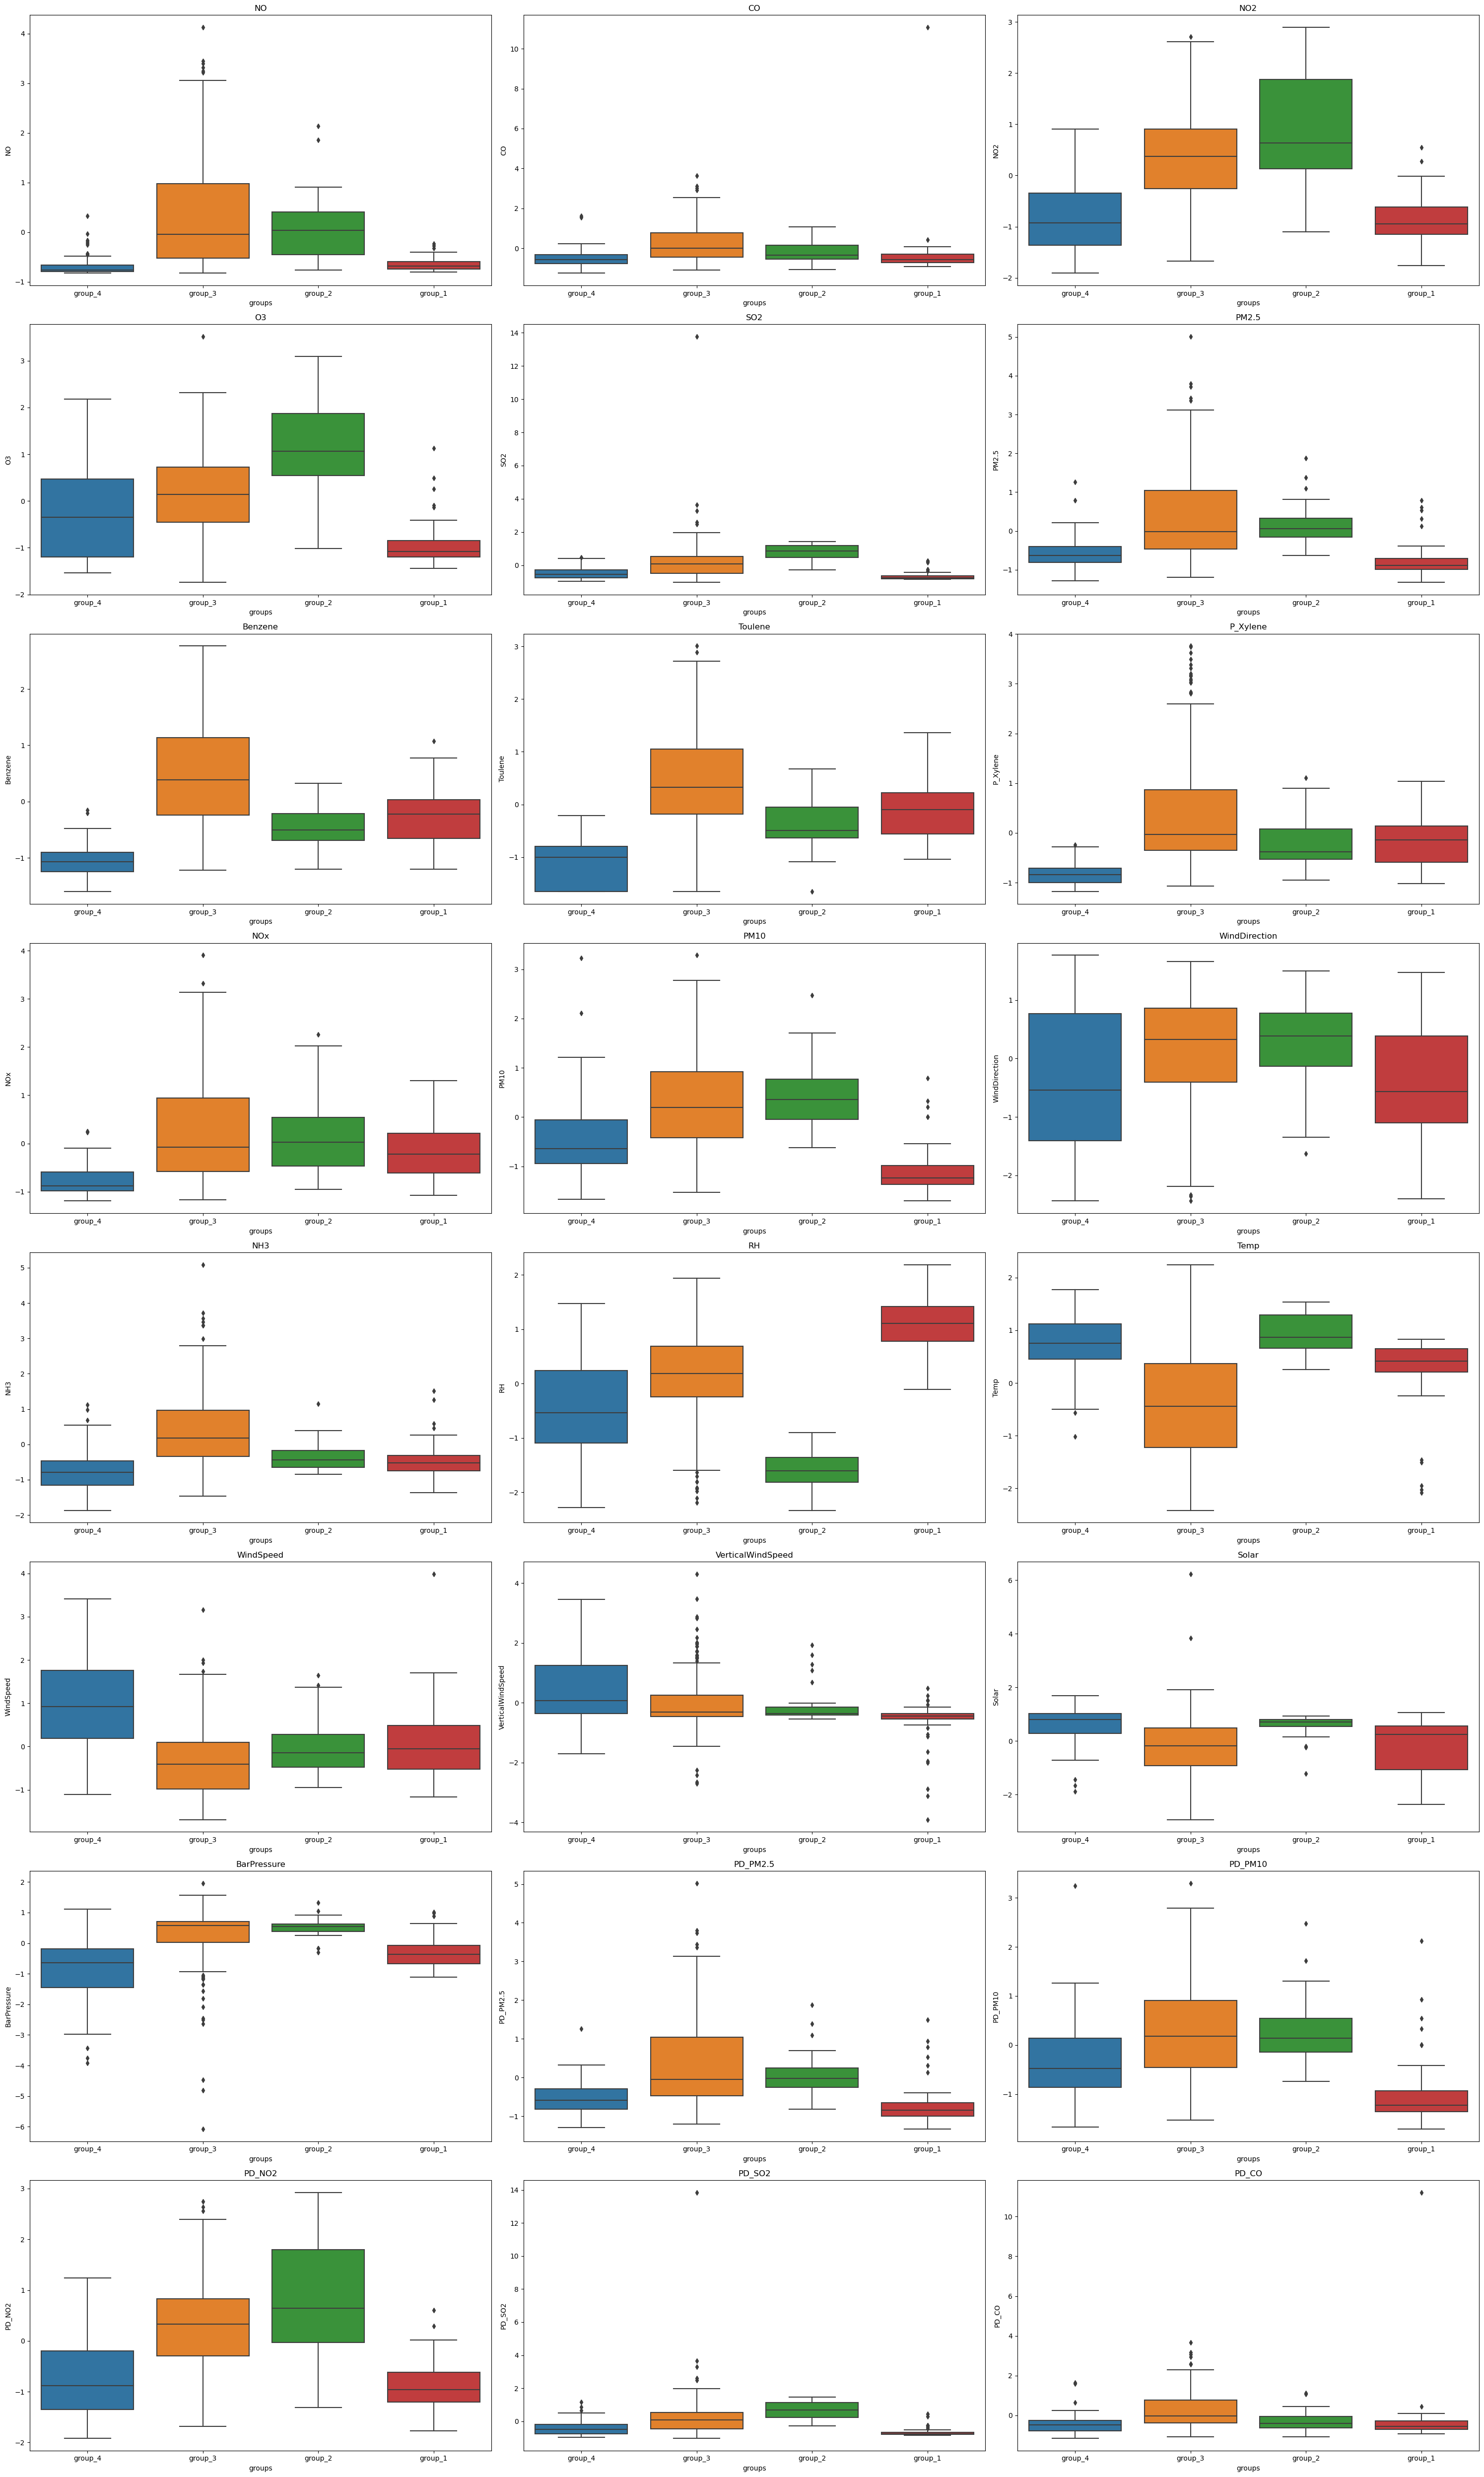

In [51]:
all_col = data_air_pol_scaled.columns[:-4].tolist()

plt.figure(figsize = (30, 50))
for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(y=data_air_pol_scaled[variable], x=data_air_pol_tsne['groups'])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**
- There are four groups in the data. Each group has a different set of characteristics.

- **Group 1 represents hot and humid areas**. As there is less variability in the pressure, the wind speed is low. Higher humidity is an indication of rain which has the potential to wash away atmospheric pollution, resulting in low levels of pollutants - fine particulate matter and hydrocarbons.

- Group 2 represents areas with medium humidity and temperature with low pressure and wind speed. The level of pollutants is medium. These might be **developing urban areas** where the Ozone (O3) concentration is medium to high, resulting in comparatively higher solar radiation.

- Group 3 is the largest and represents low-humidity and high-temperature areas. As the variability in pressure is high, the wind speed is high. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction, for example, open farmland. These might be **developed urban areas** as they have the highest level of Ozone pollutant and solar radiation, which could be a result of pollutants emitted by cars, power plants, etc. 

- Group 4 represents **industrial areas** as it has a very high concentration of hydrocarbons, which are generally a result of fuel combustion. These areas have a high level of fine particulate matter and other pollutants. As there is less variability in air pressure, the wind speed is low.

-----------------